https://stephenholiday.com/articles/2011/gender-prediction-with-python/

In [1]:
import pandas as pd
import numpy as np
import itertools
import os
from time import time, ctime
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import accuracy_score, classification_report, classification, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

from helper import plot_confusion_matrix, plot_confusion_matrix2
dim=lambda *x: [i.shape for i in x]

import wordninja

In [2]:
df = pd.read_csv('./users.gender.golden.csv')
print df.shape
print df['fname.gender'].value_counts(dropna=False)
df.head()

(121335, 9)
NaN       71935
male      40389
female     9011
Name: fname.gender, dtype: int64


,user_id,username,freq,male.prob,fname.gender,male.prob2,fname.gender2,Name,pic.gender
0,5.0,billion,2.0,1.0000,male,0.920000,male,NaN,NaN
1,63.0,paddyshyam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64.0,ArmenSoft,1.0,1.0000,male,NaN,NaN,NaN,NaN
3,128.0,okbookman,1.0,0.9945,male,0.998834,male,NaN,NaN
4,215.0,revitupmedia,1.0,1.0000,male,NaN,NaN,215_profile.jpg,NaN


In [3]:
pre9=df[(~df['fname.gender'].isnull())][['username','fname.gender']]
print pre9.shape

pre1=df[(~df['fname.gender'].isnull())& abs(df['male.prob']-0.5)>0.4][['username','fname.gender']]
pre1.shape
pre1.head()

(49400, 2)


,username,fname.gender
0,billion,male
2,ArmenSoft,male
3,okbookman,male
4,revitupmedia,male
7,sakshiinfosys,male


In [4]:
def name_count(name):
    arr = np.zeros(52+26*26+3)
    # Iterate each character
    for ind, x in enumerate(name):
        arr[ord(x)-ord('a')] += 1
        arr[ord(x)-ord('a')+26] += ind+1
    # Iterate every 2 characters
    for x in xrange(len(name)-1):
        ind = (ord(name[x])-ord('a'))*26 + (ord(name[x+1])-ord('a')) + 52
        arr[ind] += 1
        # Last character
        arr[-3] = ord(name[-1])-ord('a')
        # Second Last character
        arr[-2] = ord(name[-2])-ord('a')
    # Length of name
    arr[-1] = len(name)
    return arr

In [5]:
52+26*26+3

731

In [6]:
%%time
pre1 =pre1.reset_index(drop=True)

pre1['mock_name']= pre1['username'].apply(lambda x: ''.join([i.lower() for i in str(x) if i.isdigit()==False]))
list_list =np.array(map(name_count, pre1['mock_name']))
print list_list.shape
tmp = pd.DataFrame(data=list_list, columns=['feature_'+str(i) for i in range(731)])
print tmp.shape
tmp.head(1)

(49260, 731)
(49260, 731)
CPU times: user 939 ms, sys: 149 ms, total: 1.09 s
Wall time: 1.08 s


In [70]:
# %%time
# print cross_val_score(RandomForestClassifier(), tmp, pre0['fname.gender'], cv=10)

[ 0.8071849   0.80775477  0.80978482  0.80755177  0.80836378  0.80836378
  0.80308567  0.80653674  0.80267966  0.80182741]
CPU times: user 27.9 s, sys: 708 ms, total: 28.6 s
Wall time: 28.9 s


In [48]:
# name_count('abcdfaa')

In [71]:
# tmp = pd.DataFrame(data=name_count('abcdfaa').reshape(1,-1), columns=['feature_'+str(i) for i in range(731)])
# tmp

In [107]:
pre1.shape

(49260, 3)

In [103]:
pre0.shape

(49260, 19)

In [7]:
%%time
def add_features(df):
    
    df['last']= df['username'].str[-1]
    df['last_two']= df['username'].str[-2:]
    df['last_three']= df['username'].str[-3:]
    df['first']= df['username'].str[0].str.lower()
    df['first2']= df['username'].str[:1]
    df['first3']= df['username'].str[:2]
    df['nchar']= df['username'].apply(lambda x: len(str(x)))
    df['vowels.pct']=df['username'].apply(lambda x: len([i for i in str(x) if i in 'aeiouy'])/float(len(str(x))))
    df['digits.pct']=df['username'].apply(lambda x: sum([i.isdigit() for i in str(x)])/float(len(str(x))))
    df['last_is_vowel'] = df['username'].apply(lambda x: str(x)[-1] in 'aeiouy')
    df['first_is_vowel'] = df['username'].apply(lambda x: str(x)[0] in 'aeiouy')
    df['last_is_digit'] = df['username'].apply(lambda x: str(x)[-1].isdigit())
    df['first_is_digit'] = df['username'].apply(lambda x: str(x)[0].isdigit())
    df['digits.num'] = df['username'].apply(lambda x: sum([i.isdigit() for i in str(x)]))
    df['upper.pct'] = df['username'].apply(lambda x: sum([i.isupper() for i in str(x)]))
    df['first_is_upper'] = df['username'].apply(lambda x: str(x)[0].isupper())
    df.pop('mock_name')
    
    

    
pre0=pre1.copy()

add_features(pre0)

pre0 = pd.concat([pre0, tmp], axis=1)

print pre0.shape

(49260, 749)
CPU times: user 584 ms, sys: 50 ms, total: 634 ms
Wall time: 631 ms


In [8]:
pre0.head(1)

,username,fname.gender,last,last_two,last_three,first,first2,first3,nchar,vowels.pct,...,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,n,on,ion,b,b,bi,7,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0


In [9]:
print pre0.iloc[:,1].value_counts()
40389.0/(40389+8871)

male      40389
female     8871
Name: fname.gender, dtype: int64


0.8199147381242388

### accuracy if set all male

In [10]:
# print pre0.columns.values
print pre0.columns.values[2:8]
pre0.head()

['last' 'last_two' 'last_three' 'first' 'first2' 'first3']


,username,fname.gender,last,last_two,last_three,first,first2,first3,nchar,vowels.pct,...,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
0,billion,male,n,on,ion,b,b,bi,7,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,14.0,7.0
1,ArmenSoft,male,t,ft,oft,a,A,Ar,9,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,9.0
2,okbookman,male,n,an,man,o,o,ok,9,0.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,9.0
3,revitupmedia,male,a,ia,dia,r,r,re,12,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0
4,sakshiinfosys,male,s,ys,sys,s,s,sa,13,0.384615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,24.0,13.0


In [11]:
%%time
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed
 
to_be_encoded_cols = pre0.columns.values[2:8]
label_encode(pre0, to_be_encoded_cols)


CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 121 ms


In [12]:
X_train, X_test, y_train, y_test =train_test_split(pre0.iloc[:,2:], pre0.iloc[:,1], test_size=.3, stratify =pre0.iloc[:,1])
print dim(X_train, y_train, X_test, y_test )
X_train.head(1)

[(34482, 747), (34482,), (14778, 747), (14778,)]


,last,last_two,last_three,first,first2,first3,nchar,vowels.pct,digits.pct,last_is_vowel,...,feature_721,feature_722,feature_723,feature_724,feature_725,feature_726,feature_727,feature_728,feature_729,feature_730
27638,46,991,3636,19,45,1557,9,0.333333,0.0,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,9.0


In [13]:
# cross_val_score(RandomForestClassifier(), pre0.iloc[:,2:], pre0.iloc[:,1], cv=10)
print y_train.value_counts()

## true labels
print len(y_test)
y_test.value_counts()

male      28272
female     6210
Name: fname.gender, dtype: int64
14778


male      12117
female     2661
Name: fname.gender, dtype: int64

In [49]:
%%time
fr=RandomForestClassifier()
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 4.04 s, sys: 590 ms, total: 4.63 s
Wall time: 4.63 s


0.819935038571
0.811002842063
Confusion matrix, without normalization
[[  272  2389]
 [  404 11713]]


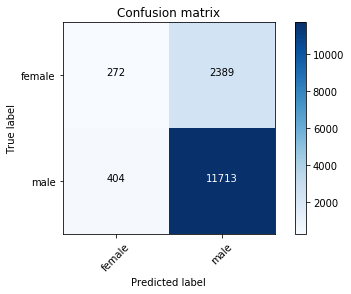

In [50]:
print 12117/14778.0
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

In [144]:
%%time
fr=RandomForestClassifier(n_estimators=150, min_samples_split=5)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 36.4 s, sys: 110 ms, total: 36.5 s
Wall time: 36.8 s


0.785153606713
0.828461226147
Confusion matrix, without normalization
[[  141  2520]
 [   15 12102]]


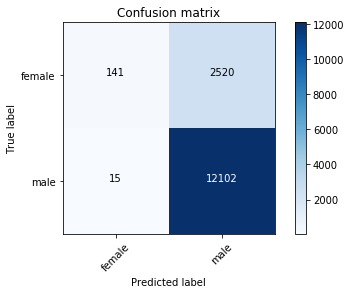

In [145]:
print 12117/14778.0
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

In [146]:
%%time
fr=RandomForestClassifier(n_estimators=300, min_samples_split=3)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 1min 11s, sys: 185 ms, total: 1min 12s
Wall time: 1min 12s


0.785153606713
0.829476248477
Confusion matrix, without normalization
[[  161  2500]
 [   20 12097]]


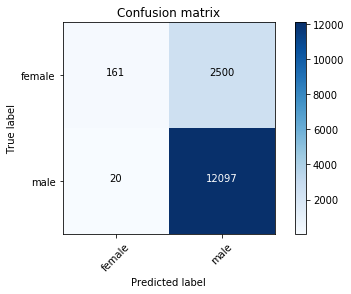

In [147]:
print 12117/14778.0
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

In [112]:
RandomForestClassifier?

In [119]:
%%time
fr=RandomForestClassifier(n_estimators=200
                          , min_samples_split=6, n_jobs=24, criterion='entropy')
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 58.6 s, sys: 148 ms, total: 58.7 s
Wall time: 4.73 s


0.819935038571
0.828258221681
Confusion matrix, without normalization
[[  131  2530]
 [    8 12109]]


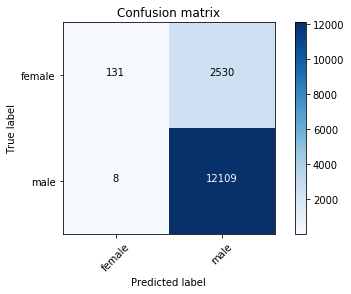

In [120]:
print 12117/14778.0
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

https://www.kaggle.com/hadend/tuning-random-forest-parameters

In [16]:
RandomForestClassifier?

In [152]:
print 12117/14778.0

0.819935038571


In [27]:
%%time
fr=RandomForestClassifier(n_estimators=102400, min_samples_split=6, n_jobs=24)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 8h 57min 23s, sys: 1min 26s, total: 8h 58min 50s
Wall time: 25min 25s


0.819935038571
0.827581540127
Confusion matrix, without normalization
[[  119  2542]
 [    6 12111]]


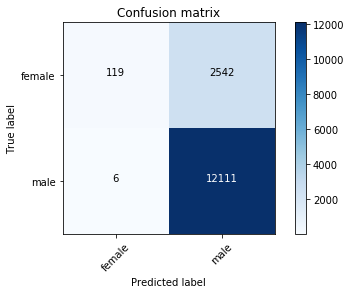

In [28]:
print 12117/14778.0
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

In [30]:
SVC?

https://stackoverflow.com/questions/9299346/fastest-svm-implementation-usable-in-python

In [ ]:
%%time
svm=SVC()
svm.fit(X_train, y_train)
## predict labels
svm_p = svm.predict(X_test)
pd.Series(svm_p).value_counts()

0.819935038571
0.818040330221
Confusion matrix, without normalization
[[   80  2581]
 [  108 12009]]


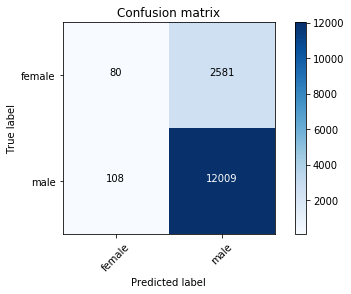

In [34]:
print 12117/14778.0
print accuracy_score(y_test, svm_p)
plot_confusion_matrix(confusion_matrix(y_test,svm_p), ['female','male'])

0.714846393287
Confusion matrix, without normalization
[[  461  2200]
 [ 2014 10103]]


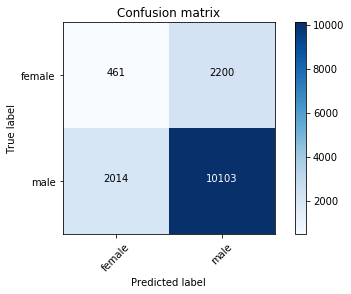

CPU times: user 12.4 s, sys: 614 ms, total: 13 s
Wall time: 13.1 s


In [132]:
%%time
lsvm = LinearSVC()
lsvm.fit(X_train, y_train)
lsvm_pr=lsvm.predict(X_test)
pd.Series(lsvm_pr).value_counts()
print accuracy_score(y_test, lsvm_pr)
plot_confusion_matrix(confusion_matrix(y_test,lsvm_pr), ['female','male'])

In [54]:
confusion_matrix(y_test,fr_p)

array([[  272,  2389],
       [  404, 11713]])

In [55]:
d_train.get_label()

array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

### try xgboost

https://github.com/dmlc/xgboost/blob/master/doc/parameter.md

In [36]:
import xgboost as xgb

/home/shj16110/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
d_train = xgb.DMatrix(X_train, label=y_train.map({'male':1, 'female':0}))
d_test = xgb.DMatrix(X_test, label=y_test.map({'male':1, 'female':0}))

In [38]:
d_train.get_label()

array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [129]:
RANDOM_STATE = 2017
params = {
    'min_child_weight': 0.7,
#     'eta': 0.1,
    'colsample_bytree': 0.7,
    'max_depth': 9,
    'subsample': 0.7,
    'alpha': 0.2,
    'lambda':0.8,
    'gamma': 0.2,
    'silent': 0,
    'learning_rate':0.05,
    'verbose_eval': True,
    'seed': RANDOM_STATE,
    'objective':"binary:logistic",
#     'eval_metric':'error'
#     'num_class':1
    'n_jobs':12
    
}
watchlist = [(d_train, 'train'), (d_test, 'test')]

def xg_eval(pred, dtrain):
    y = dtrain.get_label()
    tmp = map(lambda x: 0 if x<0.5 else 1, pred)
    return 'acc', accuracy_score(y, tmp)

In [138]:
def female_eval(pred, dtrain):
    y = dtrain.get_label()
    tmp = map(lambda x: 0 if x<0.5 else 1, pred)
    cof = confusion_matrix(y, tmp)
    g_f_c = cof[0][0]
    b_f_c = cof[1][0]
    r_f_c = cof[0][1]
    target = (g_f_c - 1.1*b_f_c)/float(r_f_c)
    return 'female_acc',target
    

In [139]:
start=time()

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, 
                verbose_eval=20, feval=female_eval, maximize=True)
                


'!!! used %.2f s'%(time()-start)

[0]	train-female_acc:0.035592	test-female_acc:-0.033022
Multiple eval metrics have been passed: 'test-female_acc' will be used for early stopping.

Will train until test-female_acc hasn't improved in 100 rounds.
[20]	train-female_acc:0.044362	test-female_acc:0.006412
[40]	train-female_acc:0.054851	test-female_acc:0.007252
[60]	train-female_acc:0.072905	test-female_acc:0.006547
[80]	train-female_acc:0.089281	test-female_acc:0.009182
[100]	train-female_acc:0.116109	test-female_acc:0.008089
[120]	train-female_acc:0.135316	test-female_acc:0.011954
[140]	train-female_acc:0.15842	test-female_acc:0.014175
[160]	train-female_acc:0.18046	test-female_acc:0.015259
[180]	train-female_acc:0.204056	test-female_acc:0.016381
[200]	train-female_acc:0.225267	test-female_acc:0.02036
[220]	train-female_acc:0.253527	test-female_acc:0.021746
[240]	train-female_acc:0.270252	test-female_acc:0.024536
[260]	train-female_acc:0.295696	test-female_acc:0.025633
[280]	train-female_acc:0.327076	test-female_acc:0.0251

'!!! used 124.65 s'

accuracy 0.826837190418
statistic
male      14464
female      314
dtype: int64
Confusion matrix, without normalization
[[  208  2453]
 [  106 12011]]


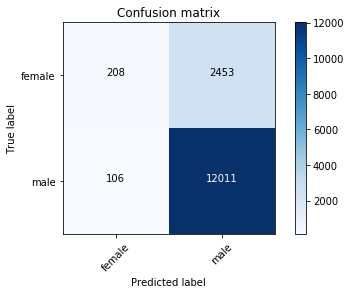

In [140]:
# pd.Series(clf.predict(d_test)).describe()
print 'accuracy',accuracy_score(d_test.get_label(), clf.predict(d_test)>.5)
print 'statistic'
print pd.Series(clf.predict(d_test)>.5).map({1:'male',0:'female'}).value_counts()
plot_confusion_matrix(confusion_matrix(d_test.get_label(),clf.predict(d_test)>.5), ['female','male'])

#### on accuracy 

In [137]:
start=time()

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, 
                verbose_eval=20, feval=xg_eval, maximize=True)
                


'!!! used %.2f s'%(time()-start)

[0]	train-acc:0.835508	test-acc:0.814589
Multiple eval metrics have been passed: 'test-acc' will be used for early stopping.

Will train until test-acc hasn't improved in 100 rounds.
[20]	train-acc:0.836929	test-acc:0.8221
[40]	train-acc:0.841106	test-acc:0.823521
[60]	train-acc:0.845543	test-acc:0.824198
[80]	train-acc:0.849719	test-acc:0.825145
[100]	train-acc:0.853112	test-acc:0.824739
[120]	train-acc:0.856824	test-acc:0.824942
[140]	train-acc:0.860681	test-acc:0.825484
[160]	train-acc:0.863842	test-acc:0.825619
[180]	train-acc:0.868627	test-acc:0.826093
[200]	train-acc:0.871382	test-acc:0.826431
[220]	train-acc:0.874833	test-acc:0.826499
[240]	train-acc:0.877994	test-acc:0.826837
[260]	train-acc:0.88188	test-acc:0.827176
[280]	train-acc:0.8842	test-acc:0.827649
[300]	train-acc:0.888493	test-acc:0.827379
[320]	train-acc:0.891973	test-acc:0.827108
[340]	train-acc:0.895192	test-acc:0.827446
[360]	train-acc:0.898237	test-acc:0.827582
[380]	train-acc:0.902442	test-acc:0.828258
[400]	tra

'!!! used 716.62 s'

accuracy 0.828393557992
statistic
male      14461
female      317
dtype: int64
Confusion matrix, without normalization
[[  221  2440]
 [   96 12021]]


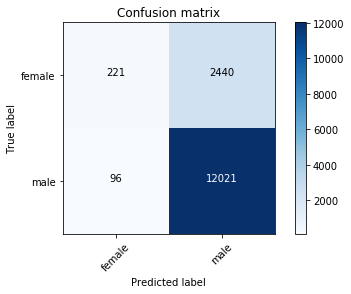

In [139]:
# pd.Series(clf.predict(d_test)).describe()
print 'accuracy',accuracy_score(d_test.get_label(), clf.predict(d_test)>.5)
print 'statistic'
print pd.Series(clf.predict(d_test)>.5).map({1:'male',0:'female'}).value_counts()
plot_confusion_matrix(confusion_matrix(d_test.get_label(),clf.predict(d_test)>.5), ['female','male'])

In [63]:
pre0.head(3)

,username,fname.gender,last,last_two,last_three,first,first2,first3,nchar,vowels.pct,digits.pct,last_is_vowel,first_is_vowel,last_is_digit,first_is_digit,digits.num,upper.pct,first_is_upper,split_words
0,billion,male,49,1419,5594,1,27,1000,7,0.428571,0.0,False,False,False,False,0,0,False,[billion]
2,ArmenSoft,male,56,1034,7740,0,0,43,9,0.222222,0.0,False,False,False,False,0,2,True,"[armen, soft]"
3,okbookman,male,49,816,6707,15,41,1437,9,0.444444,0.0,False,True,False,False,0,0,False,"[ok, book, man]"


In [50]:
pre0['split_words']=pre0['username'].\
apply(lambda x: ''.join([i for i in str(x) if i.isdigit()==False])).\
apply(lambda x: wordninja.split(str(x).lower()))

In [51]:
from genderizer.genderizer import Genderizer

In [95]:
def helper(X):
    tmp = list(map(Genderizer.detect, X))
    tmp = [i for i in tmp if i!=None]
    try:
        tmp[0]
        return tmp
    except:
        return 

In [97]:
pre0['split_words'].apply(helper)

0                 None
2               [male]
3                 None
4             [female]
7               [male]
8                 None
10                None
11                None
12                None
15                None
16              [male]
17                None
19                None
24              [male]
28                None
29                None
31                None
32              [male]
33            [female]
35              [male]
36                None
37                None
39                None
42                None
43                None
44              [male]
47        [male, male]
48              [male]
49                None
51                None
              ...     
121296            None
121297            None
121298            None
121299          [male]
121300          [male]
121301            None
121302            None
121303            None
121304            None
121305          [male]
121306            None
121308        [female]
121309    [

In [88]:
pre0['username_split_predict'] = pre0['split_words'].apply(helper)

In [89]:
pre0['username_split_predict'].fillna('male').value_counts()

male      44398
female     4862
Name: username_split_predict, dtype: int64

In [90]:
pre0['pre_model_pred'] = pre0['username_split_predict'].fillna('male')

In [91]:
accuracy_score(pre0['fname.gender'], pre0['pre_model_pred'])

0.79401136825010155

Confusion matrix, without normalization
[[ 1793  7078]
 [ 3069 37320]]


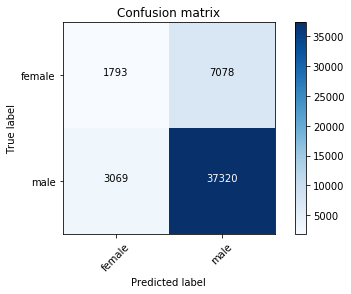

In [92]:
plot_confusion_matrix(confusion_matrix(pre0['fname.gender'], pre0['pre_model_pred']),classes=['female','male'])

### other sklearn models

In [270]:
# %%time
# lsvm = LinearSVC()
# lsvm.fit(X_train, y_train)
# lsvm_pr=lsvm.predict(X_test)
# pd.Series(lsvm_pr).value_counts()
# print accuracy_score(y_test, lsvm_pr)
# plot_confusion_matrix(confusion_matrix(y_test,lsvm_pr), ['female','male'])

In [110]:
# cross_val_score(SVC(), pre0.iloc[:,2:], pre0.iloc[:,1], cv=10)

In [140]:
# svm = SVC()
# svm

In [141]:
# %%time
# # svm.fit(X_train, y_train)

In [142]:
# from sklearn.neural_network import MLPClassifier

In [143]:
# neur = MLPClassifier(verbose=True, learning_rate='adaptive', hidden_layer_sizes=(200,20,1))
# neur

https://wiki.hpc.uconn.edu/index.php/GPU_Guide

In [145]:
# %%time
# neur.fit(X_train, y_train)
# neur_prd = neur.predict(X_test)

In [146]:
# pd.Series(neur_prd).value_counts()

In [147]:
# accuracy_score(y_test,neur_prd)

In [148]:
# plot_confusion_matrix(confusion_matrix(y_test,neur_prd), ['female','male'])

In [156]:
# %%time
# pred = svm.predict(X_test)
# pred.shape

In [157]:
# pd.Series(pred).value_counts()

In [158]:
# accuracy_score(y_test, pred)

In [159]:
# confusion_matrix(y_test,pred)

In [161]:
# plot_confusion_matrix(confusion_matrix(y_test,pred), ['female','male'])


In [149]:
# from sklearn.naive_bayes import BernoulliNB

In [150]:
# nb = BernoulliNB()
# nb

In [162]:
# %%time
# nb.fit(X_train, y_train)
# nb_pd=nb.predict(X_test)
# print pd.Series(nb_pd).value_counts()